# kmeans

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation as ani
import seaborn as sns
import pandas as pd

In [1]:
# k-means
from sklearn import cluster
from sklearn import preprocessing

In [3]:
iris = sns.load_dataset("iris")
le = preprocessing.LabelEncoder()
le.fit_transform(iris.species)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
clf = cluster.KMeans(n_clusters=3, verbose=1)
clf.fit(iris[["sepal_length", "sepal_width"]], iris.species)

Initialization complete
Iteration  0, inertia 67.390
Iteration  1, inertia 46.036
Iteration  2, inertia 43.245
Iteration  3, inertia 39.989
Iteration  4, inertia 37.769
Iteration  5, inertia 37.200
Iteration  6, inertia 37.147
Iteration  7, inertia 37.100
Iteration  8, inertia 37.086
Converged at iteration 8
Initialization complete
Iteration  0, inertia 51.920
Iteration  1, inertia 37.765
Iteration  2, inertia 37.063
Iteration  3, inertia 37.051
Converged at iteration 3
Initialization complete
Iteration  0, inertia 62.230
Iteration  1, inertia 46.873
Iteration  2, inertia 40.701
Iteration  3, inertia 38.881
Iteration  4, inertia 38.221
Iteration  5, inertia 37.817
Iteration  6, inertia 37.351
Iteration  7, inertia 37.063
Iteration  8, inertia 37.051
Converged at iteration 8
Initialization complete
Iteration  0, inertia 54.320
Iteration  1, inertia 47.605
Iteration  2, inertia 43.791
Iteration  3, inertia 40.970
Iteration  4, inertia 38.957
Iteration  5, inertia 38.221
Iteration  6, ine

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=1)

In [5]:
[a for a in dir(clf) if not a.startswith("_") and a.endswith("_")]

['cluster_centers_', 'inertia_', 'labels_', 'n_iter_']

In [6]:
clf.inertia_, clf.n_iter_

(37.050702127659569, 4)

In [7]:
clf.cluster_centers_

array([[ 5.006     ,  3.428     ],
       [ 6.81276596,  3.07446809],
       [ 5.77358491,  2.69245283]])

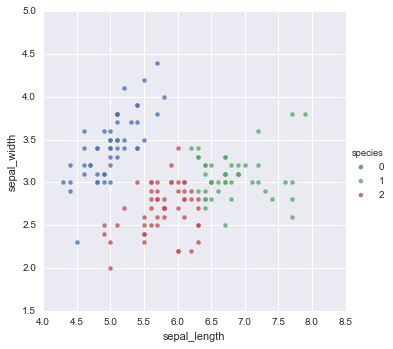

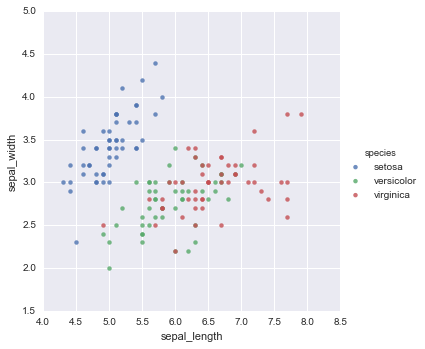

In [11]:
iris_kmeans = iris.copy()
iris_kmeans["species"] = clf.labels_
sns.lmplot(data=iris_kmeans, x="sepal_length", y="sepal_width", hue="species", fit_reg=False)
sns.lmplot(data=iris, x="sepal_length", y="sepal_width", hue="species", fit_reg=False)


In [21]:
from scipy.spatial import distance

In [30]:
distance.euclidean([0, 0], [1, 1])

1.4142135623730951

In [32]:
# http://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
np.linalg.norm(np.array([0, 0]) - np.array([1, 1]))


1.4142135623730951

In [65]:
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html
np.argmin([2,3,1]), np.argmax([2,3,1])

(2, 1)

In [69]:
reshaped = np.array([4,5,6,1,2,3]).reshape(2, 3)
reshaped

array([[4, 5, 6],
       [1, 2, 3]])

In [78]:
np.argmin(reshaped), np.argmax(reshaped)
# flattenしたときのIndex

(3, 2)

In [279]:
import pandas as pd
print(pd.isnull(np.array(['a', 1, 'b', np.nan, np.nan])))
print(pd.isnull(np.array(['a', 1, 'b', np.nan, None])))
np.array(['a', 1, 'b', np.nan, None])

[False False False False False]
[False False False  True  True]


array(['a', 1, 'b', nan, None], dtype=object)

In [ ]:
# ランダムにクラスタとなるデータをK個選ぶ
# 各データは、K個のデータうち、一番近いクラスタに属させる
# クラスタ内の重心を変更する

In [60]:
import collections

def kmeans(data, n_cluster=3, max_iter=300, random_state=None, verbose=None):
    # 初期化
    centroids = init_centroids(data, random_state)
    
    # 所属クラスタ
    old_centroids = centroids
    old_clusters = np.zeros(len(data))
    
    for i in range(max_iter):
        new_clusters = clusters(data, centroids)
        if verbose:
            print(i, collections.Counter(new_clusters), centroids)

        centroids = move_centroids(data, n_cluster, new_clusters)
        if old_centroids == centroids:
            print("old_centroids == centroids")
            print(old_centroids)
            print(centroids)
            break
        old_centroids = centroids
    return new_clusters

In [18]:
def init_centroids(data, random_state):
    np.random.seed(random_state)
    centroids_idx = np.random.choice(data.index, n_cluster)
    centroids = [(data.loc[idx, "sepal_length"], data.loc[idx, "sepal_width"]) for idx in centroids_idx]
    return centroids

In [19]:
def clusters(data, centroids):
    d_centroids = []
    for length, width in centroids:
        d_centroids.append(np.linalg.norm(
            np.c_[data.sepal_length - length, data.sepal_width - width], axis=1))

    d_centroids = np.array(d_centroids).T
    clusters = np.argmin(d_centroids, axis=1)
    return clusters


In [26]:
def move_centroids(data, n_cluster, clusters):
    new_centroids = []
    for c in range(n_cluster):
        c_data = data[clusters == c]
        center = c_data.sepal_length.mean(), c_data.sepal_width.mean()
        new_centroids.append(center)
    return new_centroids


0 Counter({2: 85, 0: 47, 1: 18}) [(4.5999999999999996, 3.2000000000000002), (7.7000000000000002, 3.7999999999999998), (5.7999999999999998, 2.7000000000000002)]
1 Counter({2: 67, 0: 56, 1: 27}) [(4.9425531914893615, 3.3659574468085105), (7.283333333333336, 3.1333333333333337), (6.036470588235295, 2.870588235294118)]
2 Counter({2: 63, 0: 56, 1: 31}) [(5.014285714285713, 3.3357142857142863), (7.096296296296296, 3.1148148148148134), (6.031343283582089, 2.8014925373134334)]
3 Counter({2: 60, 0: 56, 1: 34}) [(5.014285714285713, 3.3357142857142863), (7.032258064516128, 3.0870967741935478), (5.995238095238095, 2.795238095238096)]
4 Counter({2: 58, 0: 56, 1: 36}) [(5.014285714285713, 3.3357142857142863), (6.985294117647057, 3.079411764705882), (5.97, 2.785000000000001)]
5 Counter({0: 56, 2: 56, 1: 38}) [(5.014285714285713, 3.3357142857142863), (6.952777777777776, 3.0861111111111104), (5.955172413793104, 2.770689655172414)]
6 Counter({0: 56, 2: 55, 1: 39}) [(5.014285714285713, 3.3357142857142863

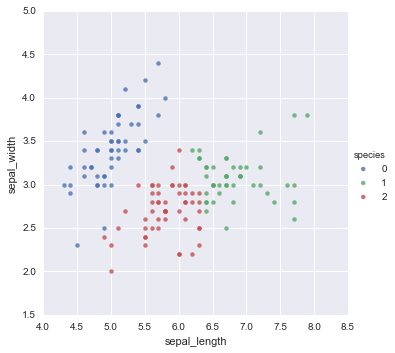

In [62]:
import ipywidgets

@ipywidgets.interact(
    n_cluster=(2, 6, 1),
    max_iter=(1, 100, 1),
    verbose=False
)
def run_my_kmeans(n_cluster=3, max_iter=30, verbose=False):
    iris_my_kmeans = iris.copy()
    iris_my_kmeans["species"] = kmeans(iris_my_kmeans,
                                                       n_cluster=n_cluster,
                                                       max_iter=max_iter,
                                                       random_state=0,
                                                       verbose=verbose)
    sns.lmplot(data=iris_my_kmeans, x="sepal_length", y="sepal_width", hue="species", fit_reg=False)


In [58]:
labels = pd.DataFrame({
        "sk": iris_kmeans.species,
        "my": iris_my_kmeans.species
    })
labels["same"] = labels.sk == labels.my
labels.same.sum(), labels.shape[0]

(148, 150)